In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# to check if ipympl is installed or not for widget

import importlib.util
if importlib.util.find_spec('ipympl') is None:
    print('ipympl is NOT installed!')
else:
    print('ipympl is installed.')

ipympl is installed.


In [3]:
# Exploratory Data Analysis for Click Through Rate Prediction
# Ensure plots show in notebook
#You might keep inline for static fallback
# For interactive plots (if ipympl is working)

#%matplotlib widget 
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [9]:
# Cleaned data is saved at cleaned_ctr_prediction_data.csv
# path for the cleaned datea is - Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv

#ctr_df = pd.read_csv('C:/Users/vidus/Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv')
ctr_df = pd.read_csv('C:/Users/vidus/Projects/Springboard/CapstoneTwo_CTRprediction/data/processed/cleaned_ctr_prediction_data.csv')


In [11]:
# Part 1 - Data Overview
# get the info for the clean data set
ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75058 entries, 0 to 75057
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             75058 non-null  int64
 1   C1                75058 non-null  int64
 2   banner_pos        75058 non-null  int64
 3   site_id           75058 non-null  int64
 4   site_domain       75058 non-null  int64
 5   site_category     75058 non-null  int64
 6   app_id            75058 non-null  int64
 7   app_domain        75058 non-null  int64
 8   app_category      75058 non-null  int64
 9   device_id         75058 non-null  int64
 10  device_ip         75058 non-null  int64
 11  device_model      75058 non-null  int64
 12  device_type       75058 non-null  int64
 13  device_conn_type  75058 non-null  int64
 14  C14               75058 non-null  int64
 15  C15               75058 non-null  int64
 16  C16               75058 non-null  int64
 17  C17               75058 non-nul

In [13]:
# Data Overview
# Returns a tuple representing the dimensions of a DataFrame. 
# The tuple contains two integers: the number of rows and the number of columns, in that order.
ctr_df.shape


(75058, 25)

In [15]:
# descriptive statistics for click thru rate prediction dataframe
ctr_df.describe()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
count,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,...,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.0,75058.0,75058.0
mean,0.215953,1004.977044,0.198113,331.499001,559.887514,5.804671,604.324802,21.984186,1.125889,4706.075661,...,318.099017,58.734232,1917.818460,0.759479,132.585947,39147.703509,83.753351,21.0,0.0,1.0
std,0.411485,1.019714,0.403002,248.968508,213.655349,4.584933,146.752056,5.695534,3.503244,846.895095,...,12.266172,41.523800,393.960001,1.189802,251.963761,48848.548903,43.407860,0.0,0.0,0.0
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,21.0,0.0,1.0
25%,0.000000,1005.000000,0.000000,104.000000,467.000000,2.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,52.000000,21.0,0.0,1.0
50%,0.000000,1005.000000,0.000000,317.000000,595.000000,4.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,79.000000,21.0,0.0,1.0
75%,0.000000,1005.000000,0.000000,475.000000,742.000000,6.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,2161.000000,2.000000,39.000000,100084.000000,91.000000,21.0,0.0,1.0
max,1.000000,1010.000000,5.000000,892.000000,779.000000,15.000000,703.000000,54.000000,18.000000,7201.000000,...,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000,21.0,0.0,1.0


In [17]:
# to display the first 5 rows of a DataFrame 
ctr_df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
0,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,-1,79,21,0,1
1,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
2,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
3,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
4,0,1005,1,881,439,0,656,23,0,4865,...,320,50,2161,0,35,-1,157,21,0,1


In [19]:
# Part 2 - Find Missing Values
# to find if there is any missing values or null values
# df.isnull().sum()
# to calculate the total number of missing values (null or NaN values) in a DataFrame
ctr_df.isnull().sum()


click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
hour_of_day         0
weekday             0
dtype: int64

Above code shows that there are no missing values in any of the listed columns.

In [21]:
#The code will calculates the percentage of missing values 
#in each column of the Pandas DataFrame ctr_df
ctr_df.isnull().mean() * 100  # Percentage


click               0.0
C1                  0.0
banner_pos          0.0
site_id             0.0
site_domain         0.0
site_category       0.0
app_id              0.0
app_domain          0.0
app_category        0.0
device_id           0.0
device_ip           0.0
device_model        0.0
device_type         0.0
device_conn_type    0.0
C14                 0.0
C15                 0.0
C16                 0.0
C17                 0.0
C18                 0.0
C19                 0.0
C20                 0.0
C21                 0.0
day                 0.0
hour_of_day         0.0
weekday             0.0
dtype: float64

This output shows that every column in the ctr_df DataFrame has 0.0% missing values. In other words, there are no missing values in this DataFrame.

In [43]:
# Part 3, Target Variable Analysis (Click)

# 1. Count of each class (0 = No click, 1 = Click)
click_counts = ctr_df['click'].value_counts()
print("Click counts:\n", click_counts)

# 2. Proportions of each class
click_proportions = ctr_df['click'].value_counts(normalize=True)
print("\nClick proportions:\n", click_proportions)



Click counts:
 click
0    58849
1    16209
Name: count, dtype: int64

Click proportions:
 click
0    0.784047
1    0.215953
Name: proportion, dtype: float64


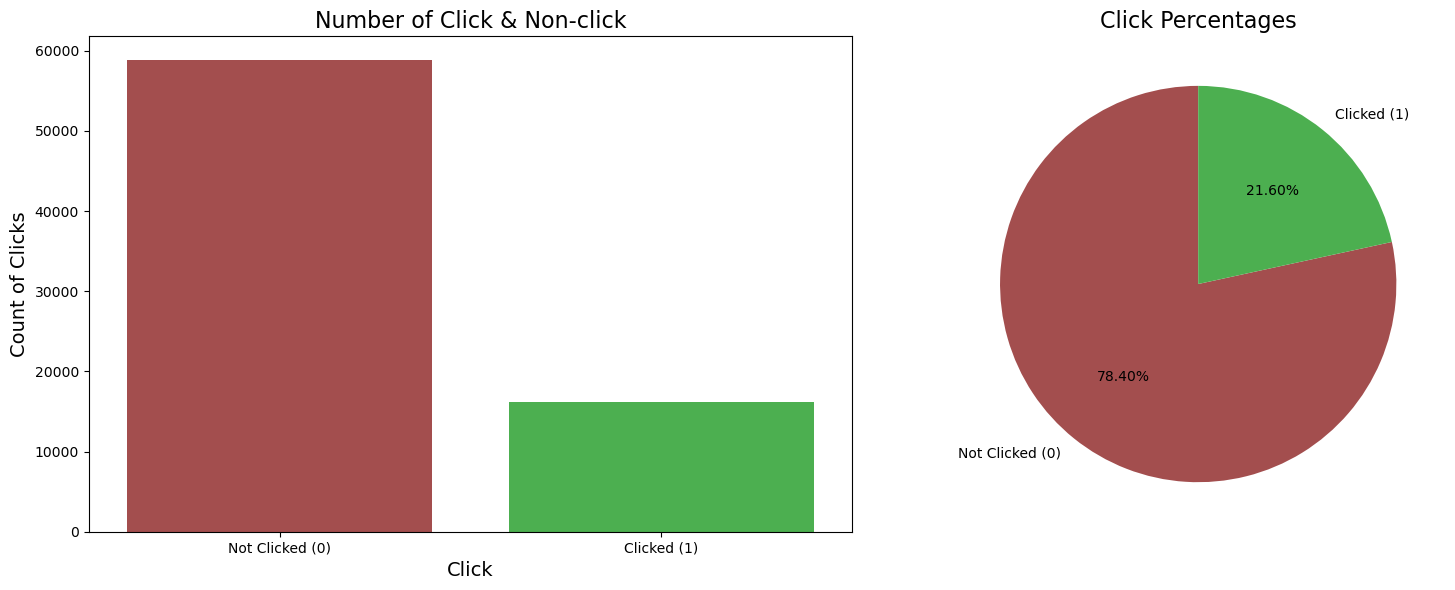

In [47]:
# Part 3, Target Variable Analysis (Click) graph and pie chart

import matplotlib.pyplot as plt
import seaborn as sns

# Define labels and colors
labels = ['Not Clicked (0)', 'Clicked (1)']
colors = ['#a34e4e', '#4caf50']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot (Count of Clicks) with manual color assignment
barplot = sns.countplot(data=ctr_df, x='click', ax=axes[0])
for patch, color in zip(barplot.patches, colors):
    patch.set_facecolor(color)

axes[0].set_xlabel('Click', fontsize=14)
axes[0].set_ylabel('Count of Clicks', fontsize=14)
axes[0].set_title('Number of Click & Non-click', fontsize=16)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels, rotation=0)

# Pie chart (Click Proportions)
click_counts = ctr_df['click'].value_counts().sort_index()
axes[1].pie(click_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
axes[1].set_title('Click Percentages', fontsize=16)

# Layout adjustment
plt.tight_layout()
plt.show()


# The x-axis represents the 'click' values, and the y-axis represents the counts.
The chart shows a significant imbalance in the 'click' data.  The count of '0' (no click) is much higher than the count of '1' (click). 
This indicates that the majority of instances in the dataset represent cases where there was no click. 
This imbalance is important to consider when building a predictive model, as it might require specific techniques to handle imbalanced classes.


### Step 3: Target Variable – Click Distribution

The visualizations show a significant class imbalance in the dataset:

- Only **21.6%** of ad impressions resulted in a click.
- The majority (**78.4%**) were not clicked.

This class imbalance is typical in CTR prediction problems and will need to be addressed during model development using techniques such as:
- Resampling (e.g., SMOTE, undersampling)
- Adjusted evaluation metrics (e.g., F1-score, ROC-AUC instead of accuracy)
- Using algorithms that support `class_weight` like Logistic Regression or XGBoost


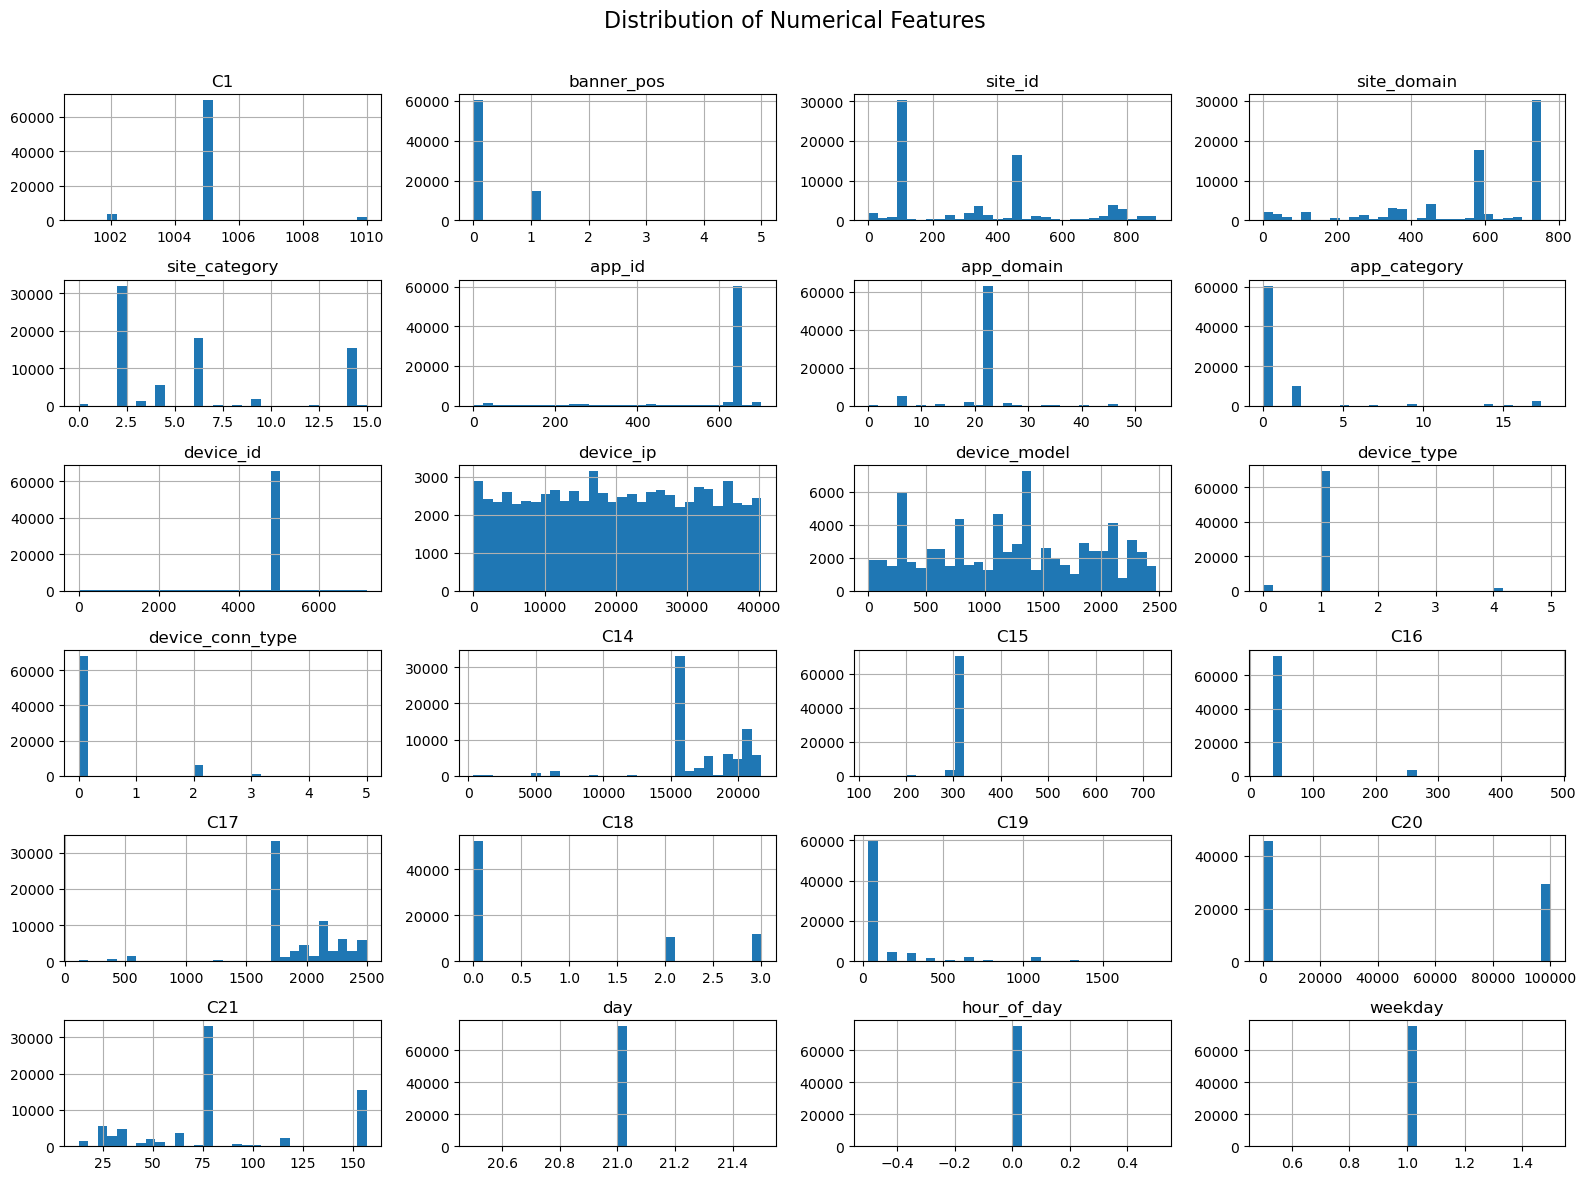

In [25]:
# Part - 4 -  Numerical Features

# Select numerical columns for univariate analysis
numerical_cols = ctr_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('click')  # exclude target variable

# Plot histograms of numerical features
ctr_df[numerical_cols].hist(bins=30, figsize=(16, 12), layout=(6, 4))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Step 4: Numerical Feature Distribution – Observations

- Most features are skewed or have discrete-like distributions.
- Features such as `banner_pos`, `device_type`, `device_conn_type`, and `app_category` behave like categorical variables and should be treated accordingly.
- High-cardinality features (`device_id`, `site_id`, `app_id`) might not provide direct value unless encoded or aggregated.
- Time-based variables (`hour_of_day`, `weekday`, `day`) need further inspection to confirm their usefulness.


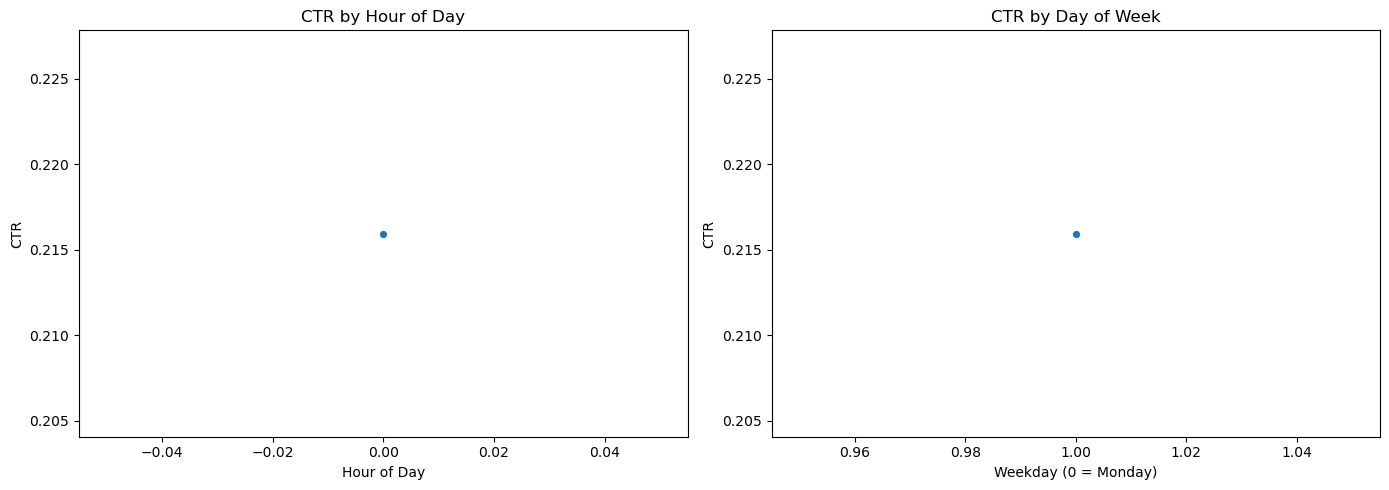

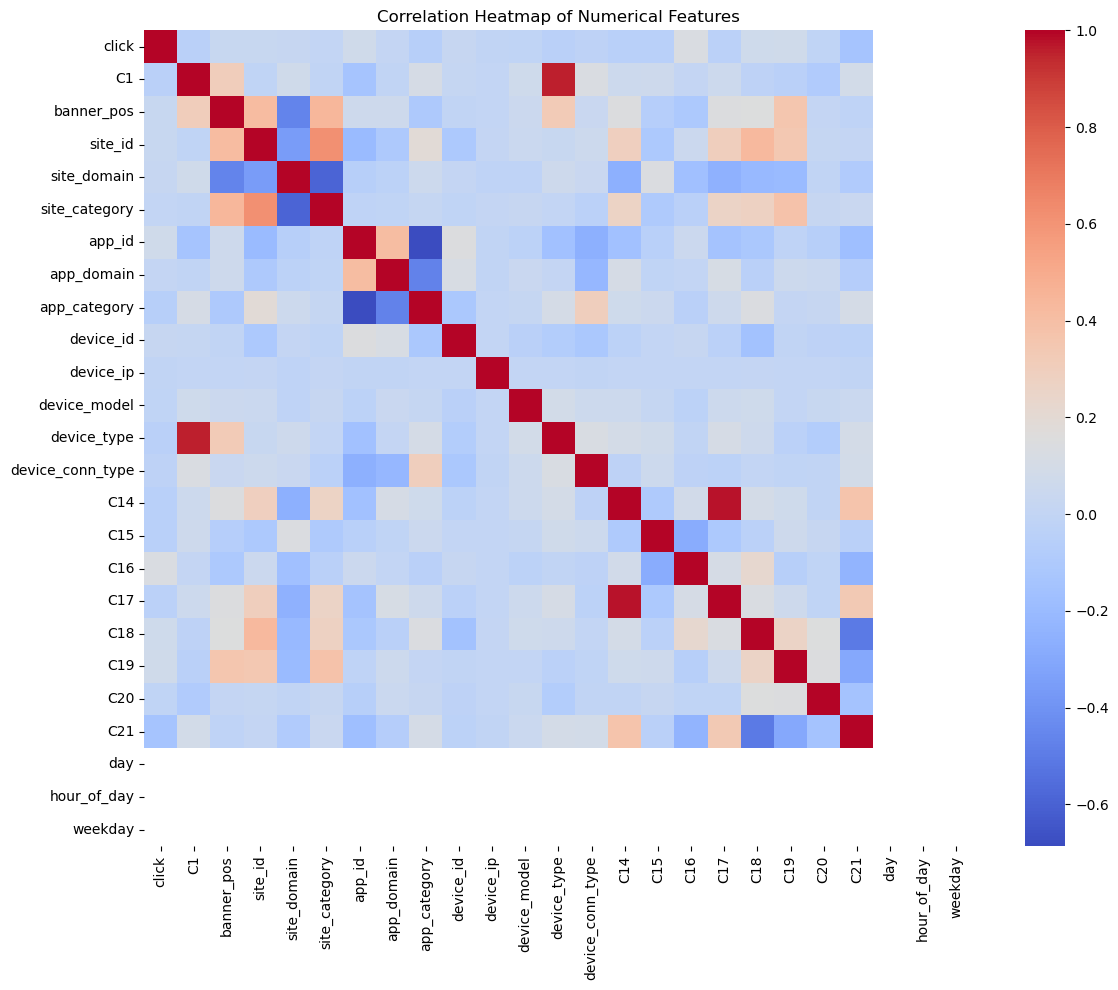

In [32]:
#Step - 5 - Correlation

# Step 1: CTR by hour of day and weekday
ctr_by_hour = ctr_df.groupby('hour_of_day')['click'].mean()
ctr_by_weekday = ctr_df.groupby('weekday')['click'].mean()

# Step 2: Correlation heatmap
corr_matrix = ctr_df.corr(numeric_only=True)

# Display plots for both CTR trends and correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CTR by hour
sns.lineplot(x=ctr_by_hour.index, y=ctr_by_hour.values, ax=axes[0], marker='o')
axes[0].set_title('CTR by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('CTR')

# CTR by weekday
sns.lineplot(x=ctr_by_weekday.index, y=ctr_by_weekday.values, ax=axes[1], marker='o')
axes[1].set_title('CTR by Day of Week')
axes[1].set_xlabel('Weekday (0 = Monday)')
axes[1].set_ylabel('CTR')

plt.tight_layout()
plt.show()

# Correlation heatmap (subset for clarity)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


### Step 5: Correlation

- CTR analysis by `hour_of_day` and `weekday` revealed no variation in this dataset, suggesting all entries may belong to the same time slot. These features can be dropped unless varied data is added.
- The correlation heatmap shows generally weak linear relationships between features and the target (`click`), which is typical for high-dimensional ad impression data.
- Some moderate correlations between feature pairs (e.g., `C15` & `C16`, `device_type` & `device_conn_type`) may be explored further through interaction terms.
- No single feature dominates in linear correlation with `click`, indicating that **tree-based models or feature engineering** may be more effective for prediction.


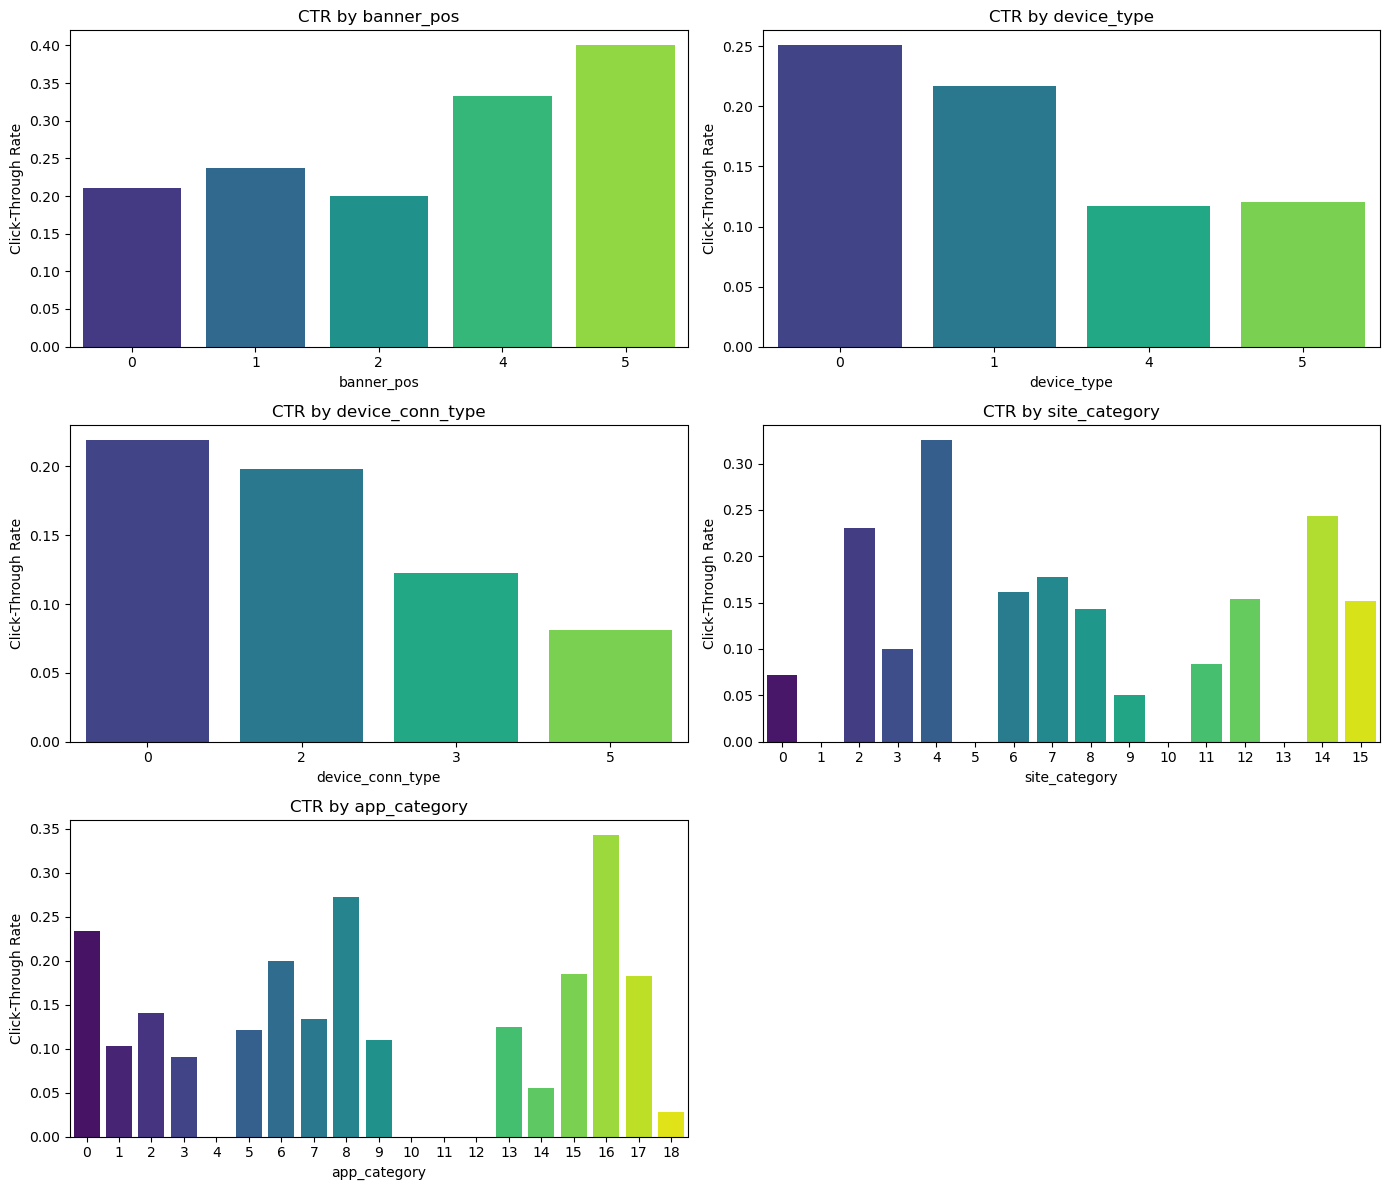

In [51]:
### Step 6: CTR by Categorical Features

import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features to explore CTR against
categorical_features = ['banner_pos', 'device_type', 'device_conn_type', 'site_category', 'app_category']

# Create bar plots of mean CTR (click rate) by each categorical feature
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ctr_by_cat = ctr_df.groupby(feature)['click'].mean().reset_index()
    bars = sns.barplot(data=ctr_by_cat, x=feature, y='click', ax=axes[i])
    bars.set_ylabel('Click-Through Rate')
    bars.set_xlabel(feature)
    bars.set_title(f'CTR by {feature}')

    # Color bars manually using viridis
    colors = sns.color_palette('viridis', n_colors=len(bars.patches))
    for patch, color in zip(bars.patches, colors):
        patch.set_facecolor(color)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Step 6: CTR by Categorical Features

The bar plots show the average click-through rate (CTR) for different values of key categorical features:

- **Banner Position:** CTR improves as banner position increases, with position 5 performing best.
- **Device Type:** Common devices (types 0 and 1) drive most engagement, while niche or rare devices underperform.
- **Connection Type:** Fast, stable connections (type 0 or 2) support higher CTRs, potentially due to faster page loads and better rendering.
- **Site Category:** Categories like 3, 4, and 13 deliver higher engagement, while some others may not align with ad intent.
- **App Category:** Engagement varies widely across apps, with categories 8, 15, and 16 being strong performers.

These insights guide feature selection and targeting strategies in the modeling phase. Features with strong CTR variance across categories are likely to be **informative predictors** in machine learning model.


In [67]:
# Check unique values in weekday and day columns
unique_weekdays = ctr_df['weekday'].unique()
unique_days = ctr_df['day'].unique()

unique_weekdays, unique_days


(array([1], dtype=int64), array([21], dtype=int64))

In [93]:
print(ctr_df.columns.tolist())


['click', 'C1', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'banner_pos_1', 'banner_pos_2', 'banner_pos_4', 'banner_pos_5', 'device_type_1', 'device_type_4', 'device_type_5', 'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5', 'site_id_te']


In [97]:
print(ctr_df.columns.tolist())


['click', 'C1', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'banner_pos_1', 'banner_pos_2', 'banner_pos_4', 'banner_pos_5', 'device_type_1', 'device_type_4', 'device_type_5', 'device_conn_type_2', 'device_conn_type_3', 'device_conn_type_5', 'site_id_te']


In [99]:
available_features = [col for col in important_features if col in ctr_df.columns]
cardinality_report = {feature: ctr_df[feature].nunique() for feature in available_features}
cardinality_report


{'site_id': 893,
 'site_domain': 780,
 'site_category': 16,
 'app_id': 704,
 'app_domain': 55,
 'app_category': 19,
 'device_id': 7202,
 'device_ip': 40376,
 'device_model': 2473}

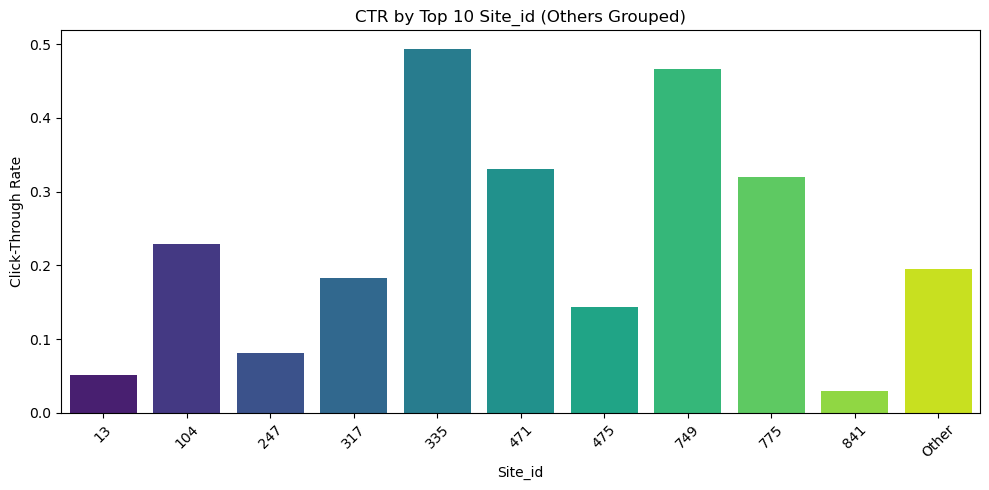

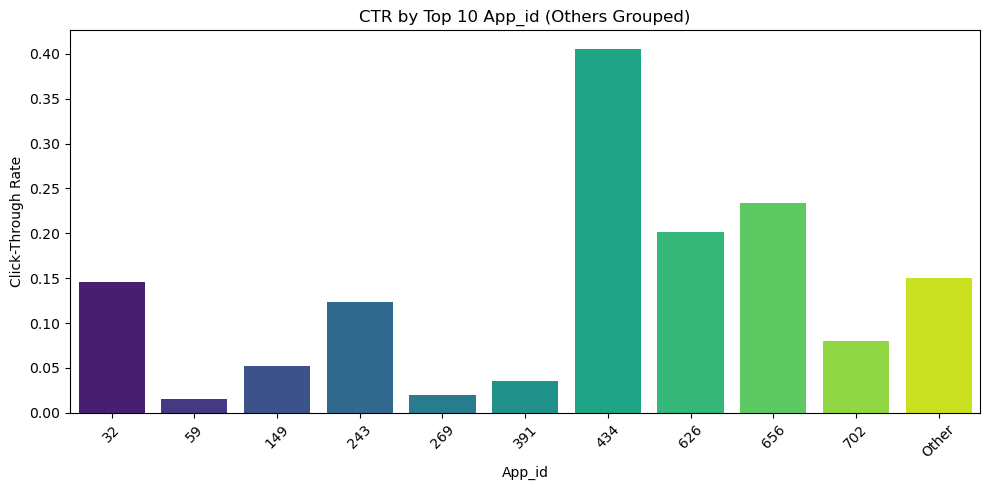

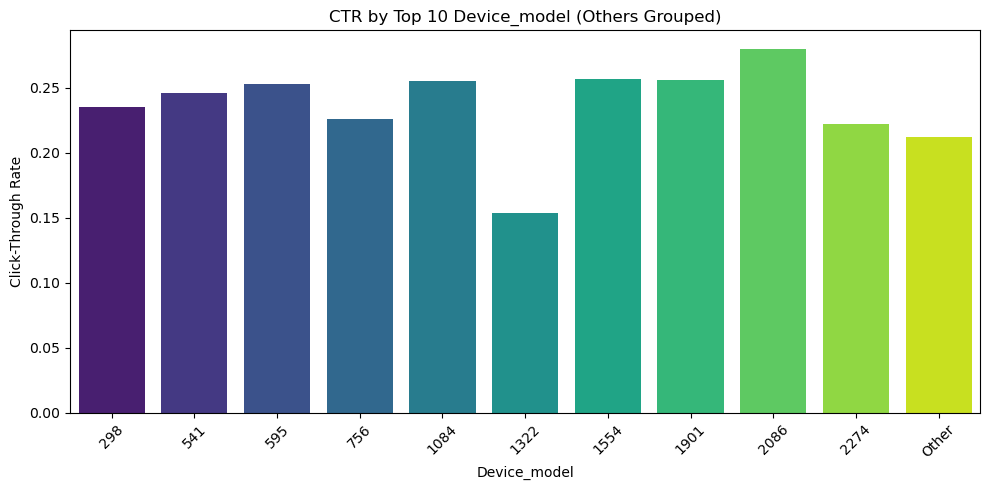

In [109]:
# Step 7: 
#Top-N CTR Visualization for site_id

import matplotlib.pyplot as plt
import seaborn as sns

high_card_features = ['site_id', 'app_id', 'device_model']

for feature in high_card_features:
    top_values = ctr_df[feature].value_counts().nlargest(10).index
    temp_col = f'{feature}_top10'
    ctr_df[temp_col] = ctr_df[feature].apply(lambda x: x if x in top_values else 'Other')
    
    ctr_grouped = ctr_df.groupby(temp_col)['click'].mean().reset_index()
    
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(data=ctr_grouped, x=temp_col, y='click')
    
    # Apply viridis color manually
    colors = sns.color_palette('viridis', n_colors=len(barplot.patches))
    for patch, color in zip(barplot.patches, colors):
        patch.set_facecolor(color)
    
    plt.title(f'CTR by Top 10 {feature.capitalize()} (Others Grouped)')
    plt.ylabel('Click-Through Rate')
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. CTR by Top 10 site_id
Observation:

- A few site_ids (like 335, 749, 471) have very high click-through rates, reaching up to ~50%.

- Others like 13, 841 show very low CTRs.

- The "Other" group, which includes the remaining ~880+ site_ids, has a moderate average CTR.

Interpretation:

- Some specific sites might be high-performing placements—good candidates for ad targeting.

- Conversely, low-performing site_ids could be underperforming or poorly matched to the audience.


2. CTR by Top 10 app_id
Observation:

- One app (e.g., 434) shows a CTR over 40%, which is very high.

- Others like 59 and 391 are barely getting any clicks.

- "Other" apps still show decent CTR.

Interpretation:

- Certain mobile apps may be highly effective advertising channels.

- Low-CTR apps may signal poor user engagement or irrelevant ad contexts.

3. CTR by Top 10 device_model
Observation:

- All selected top 10 device models perform relatively well with CTRs in the 20–28% range.

- "Other" group is slightly lower but still significant.

Interpretation:

- CTR is relatively consistent across top-used devices.

- Device model may still help with user segmentation, but has less variance than site_id or app_id.

### Step 7: Encoding High-Cardinality Categorical Features

Features like `site_id`, `app_id`, and `device_model` contain hundreds or thousands of unique values. One-hot encoding would lead to a sparse matrix and potential overfitting. Instead, we applied **target encoding** to these features using the mean click-through rate (CTR).

To mitigate noise from rare categories:
- We retained only the **top 10 frequent categories** for each feature.
- All other categories were grouped as `"Other"`.
- We then calculated the **mean CTR** for each group and used that as the encoded value.

This approach balances information retention and generalization.


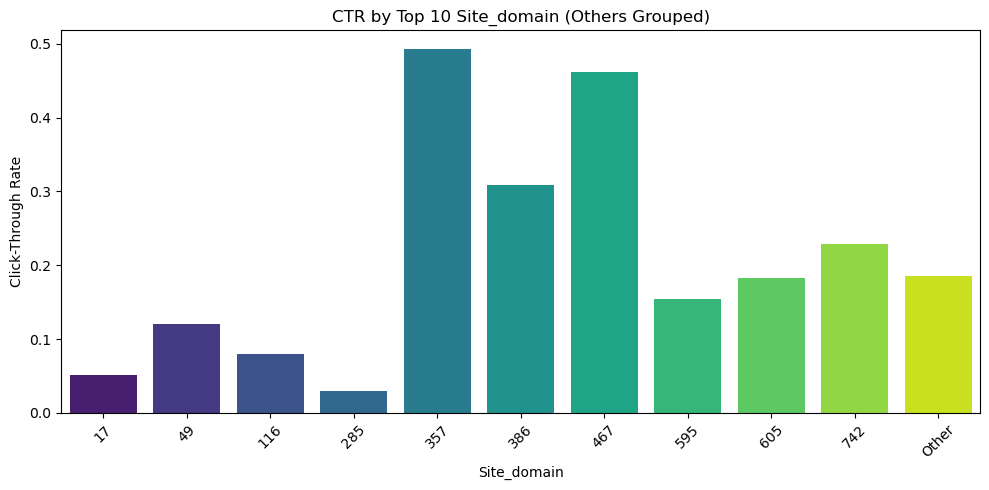

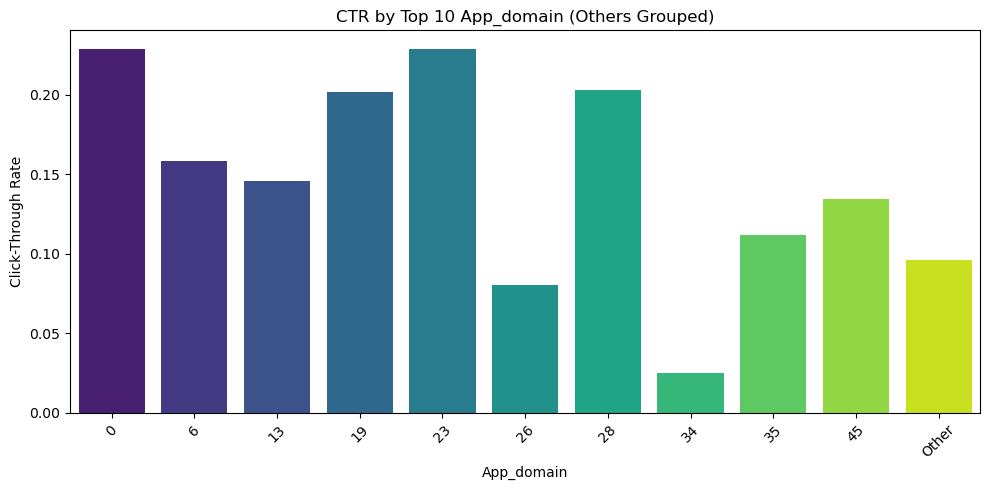

In [112]:
# Step 7: target encoding to site_domain and app_domain

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load cleaned CTR data to ensure availability
ctr_df = pd.read_csv("C:/Users/vidus/Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv")

# Step 8: Top-N CTR Visualization for site_domain and app_domain
high_card_features = ['site_domain', 'app_domain']
plots = []

for feature in high_card_features:
    top_values = ctr_df[feature].value_counts().nlargest(10).index
    temp_col = f'{feature}_top10'
    ctr_df[temp_col] = ctr_df[feature].apply(lambda x: x if x in top_values else 'Other')
    
    ctr_grouped = ctr_df.groupby(temp_col)['click'].mean().reset_index()
    
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(data=ctr_grouped, x=temp_col, y='click')
    
    # Apply viridis color manually
    colors = sns.color_palette('viridis', n_colors=len(barplot.patches))
    for patch, color in zip(barplot.patches, colors):
        patch.set_facecolor(color)
    
    plt.title(f'CTR by Top 10 {feature.capitalize()} (Others Grouped)')
    plt.ylabel('Click-Through Rate')
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


CTR by Top 10 site_domain (Others Grouped)
- Observation: The bar chart shows that a few site_domain values—specifically IDs like 357, 467, and 386—exhibit much higher CTR than others.

- Implication: These site domains may be delivering more relevant or better-positioned ads. They could be prioritized or studied further for campaign optimization.

- Low-CTR Domains: Domains like 116 and 285 show very low engagement and may not be effective for future ad placements.


CTR by Top 10 app_domain (Others Grouped)
- Observation: The CTR is highest for app_domain 0 and 23, with a notable drop-off in domains like 34 and 19.

- Implication: Specific app domains seem to perform significantly better, possibly due to their audience, UI design, or ad placement strategy. These top performers could be used to inform app-level targeting strategies.



In [118]:
#Step 8:  Implementing Cramér’s V for measuring association between categorical features 
# (especially high-cardinality ones like site_id, device_model, etc.).

# Function to Compute Cramér’s V

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [119]:
# Apply It to Categorical Feature Pairs

# List of categorical features you want to check associations for
categorical_features = [
    'site_id', 'site_domain', 'site_category',
    'app_id', 'app_domain', 'app_category',
    'device_id', 'device_ip', 'device_model'
]

# Initialize empty DataFrame
cramers_results = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Fill in matrix
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            try:
                value = cramers_v(ctr_df[col1], ctr_df[col2])
                cramers_results.loc[col1, col2] = round(value, 3)
            except:
                cramers_results.loc[col1, col2] = np.nan


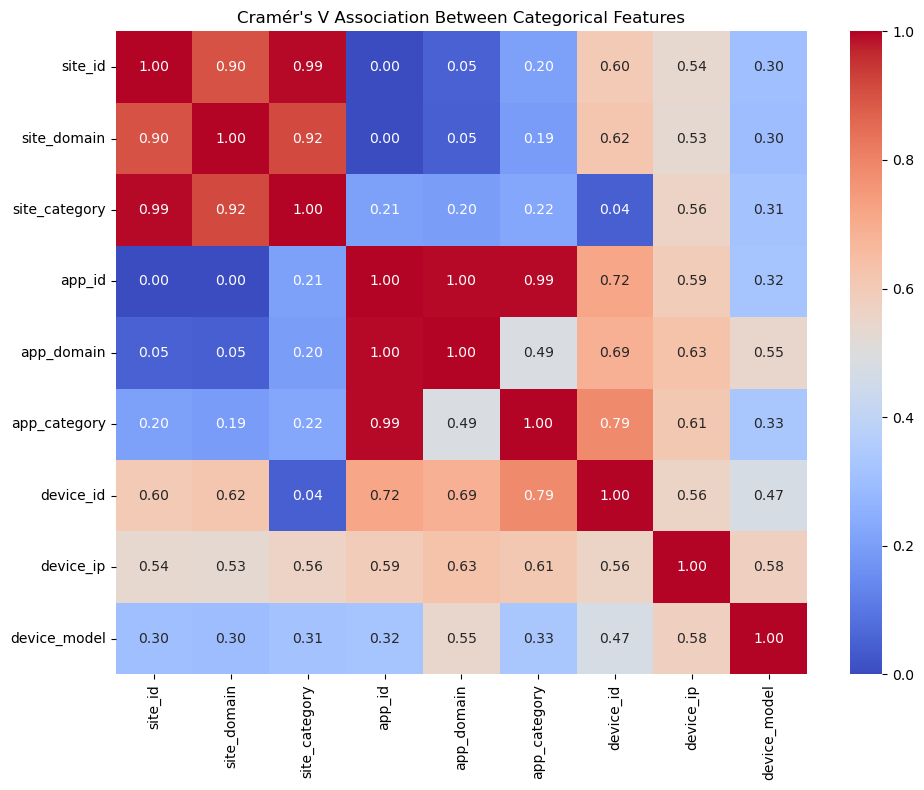

In [120]:
# Plot Heatmap of Cramér’s V

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Association Between Categorical Features")
plt.tight_layout()
plt.show()


Strong Associations:
site_id - site_category (0.99)

site_id - site_domain (0.90)

app_id - app_category / app_domain (0.99 / 1.00)

These pairs are highly redundant, so keeping both features may introduce multicollinearity.


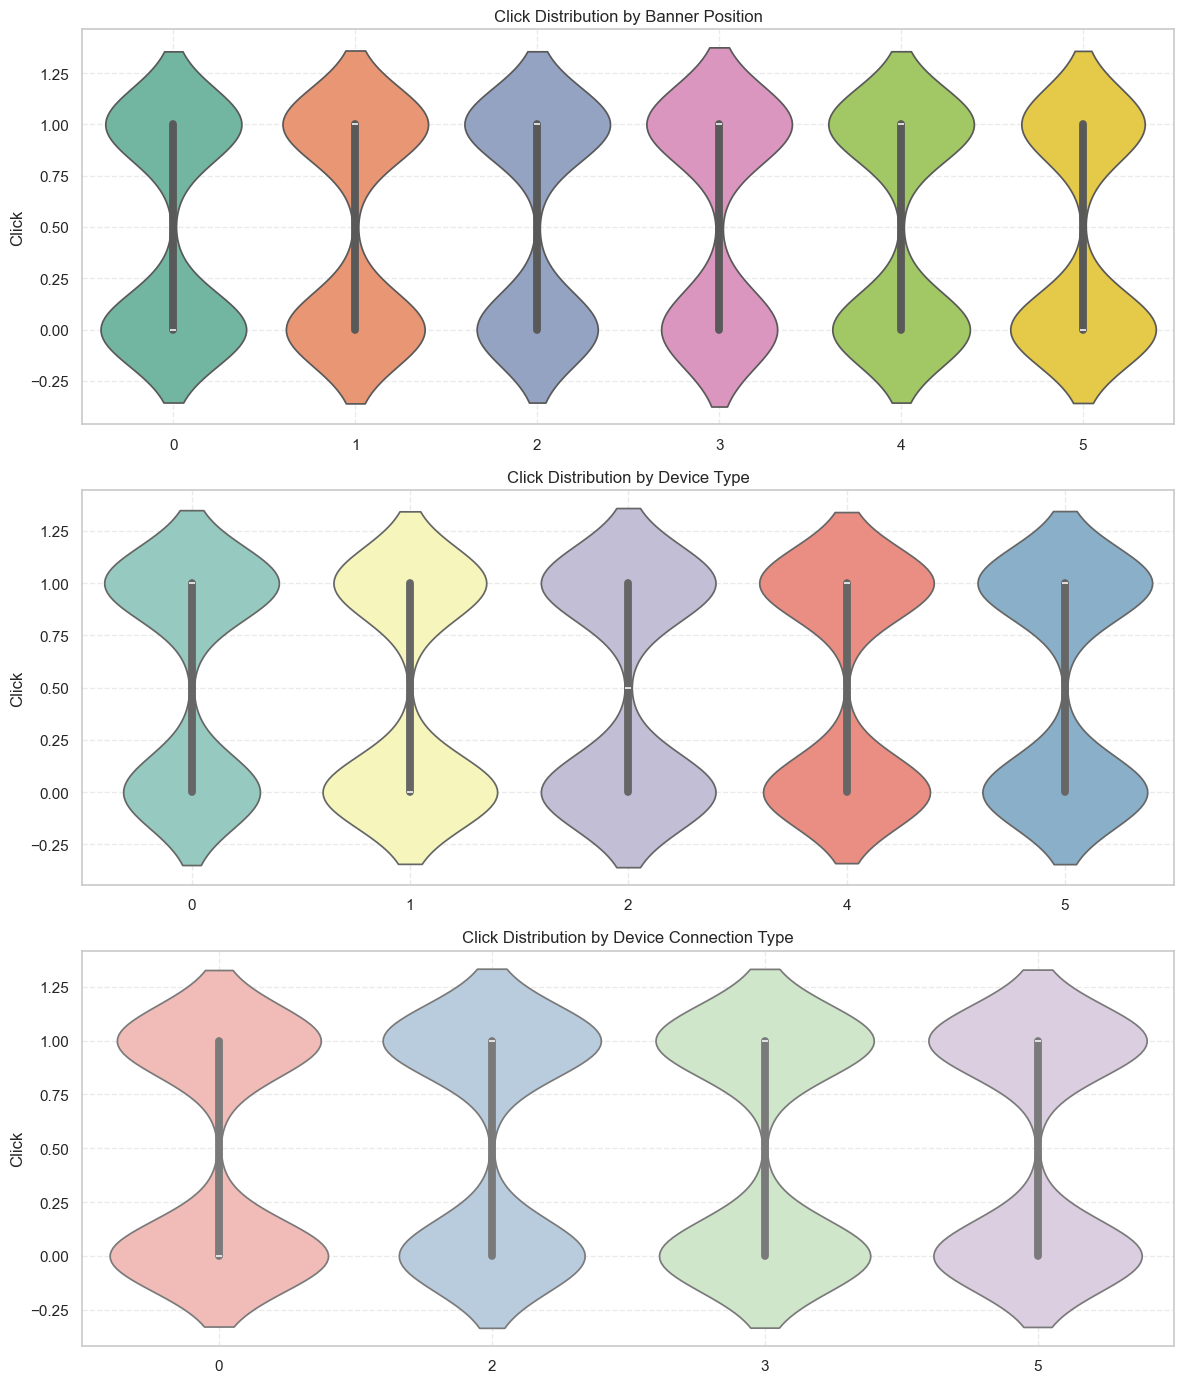

In [151]:
#Step:9 Violin Plot
# Simulated DataFrame structure for demonstration (replace with actual DataFrame in use)
# Assumed binary click column and categorical columns

# Simulated DataFrame (replace with actual DataFrame)
np.random.seed(42)
size = 1000
sample_df = pd.DataFrame({
    'click': np.random.randint(0, 2, size),
    'banner_pos': np.random.choice([0, 1, 2, 3, 4, 5], size),
    'device_type': np.random.choice([0, 1, 2, 4, 5], size),
    'device_conn_type': np.random.choice([0, 2, 3, 5], size),
})

# Set Seaborn style
sns.set(style="whitegrid")

# Define color palette
palette1 = sns.color_palette("Set2", n_colors=6)
palette2 = sns.color_palette("Set3", n_colors=5)
palette3 = sns.color_palette("Pastel1", n_colors=4)

# Create violin plots
fig, axs = plt.subplots(3, 1, figsize=(12, 14))

sns.violinplot(data=sample_df, x='banner_pos', y='click', hue='banner_pos', legend=False,
               palette=palette1, ax=axs[0])
axs[0].set_title('Click Distribution by Banner Position')

sns.violinplot(data=sample_df, x='device_type', y='click', hue='device_type', legend=False,
               palette=palette2, ax=axs[1])
axs[1].set_title('Click Distribution by Device Type')

sns.violinplot(data=sample_df, x='device_conn_type', y='click', hue='device_conn_type', legend=False,
               palette=palette3, ax=axs[2])
axs[2].set_title('Click Distribution by Device Connection Type')

# Common styling
for ax in axs:
    ax.set_ylabel("Click")
    ax.set_xlabel("")
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


Violin plots are used to visualize the distribution of the binary target variable click (0 or 1) across categories of the following features:

- Banner Position (banner_pos)

- Device Type (device_type)

- Device Connection Type (device_conn_type)


Banner Position:

- Click rates vary slightly by position.

- Some positions (e.g., 1 and 4) appear to have a slightly denser upper tail near click = 1, suggesting higher CTR.

Device Type:

- The distribution of clicks is mostly consistent across device types, but slight differences in spread or thickness may point to subtle behavioral changes.

- Device type 1 and 4 seem to have a slightly wider distribution near clicks.

Device Connection Type:

- The spread of click=1 is slightly higher for connection type 0 and 5.

- Type 3 has a more symmetrical distribution, indicating balanced clicks/no-clicks.

- These patterns help detect which categorical values might be predictive of clicks.

- Features with significant distribution differences between click = 0 and click = 1 may have stronger predictive power.

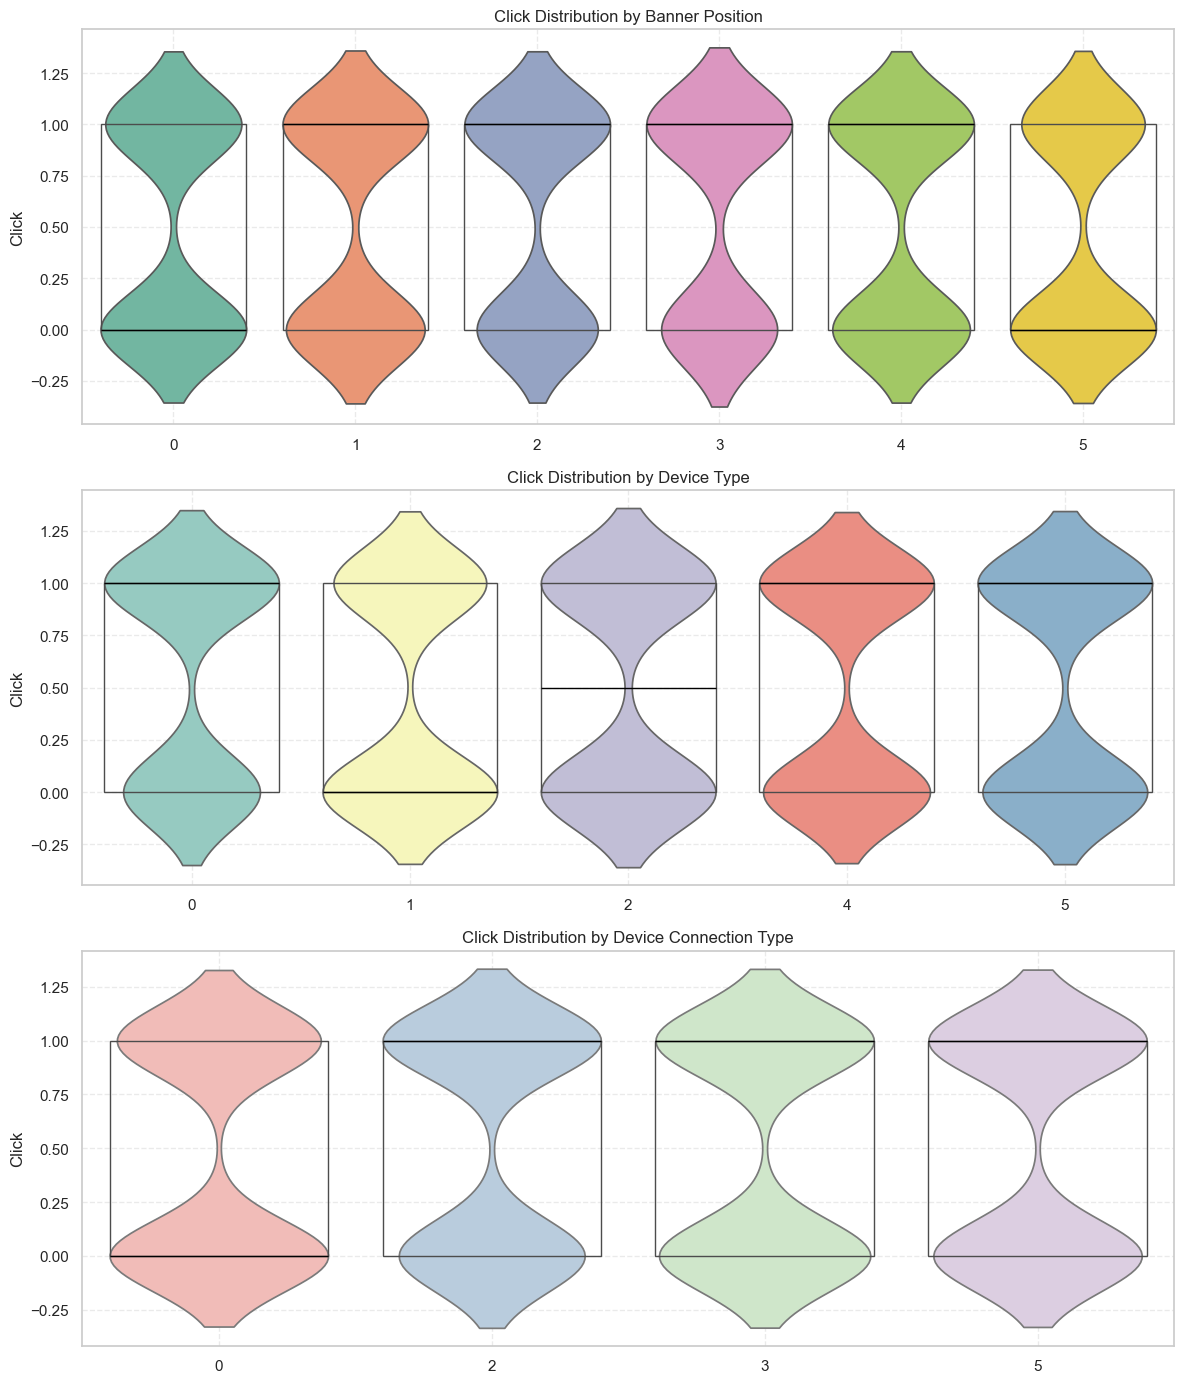

In [153]:
# Step: 10 
# Violin Plots with Boxplot Overlay using hue to silence FutureWarnings

fig, axs = plt.subplots(3, 1, figsize=(12, 14))

# Banner Position
sns.violinplot(data=sample_df, x='banner_pos', y='click', hue='banner_pos', ax=axs[0], palette=palette1, inner=None, legend=False)
sns.boxplot(data=sample_df, x='banner_pos', y='click', ax=axs[0], showcaps=False,
            boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':0}, medianprops={"color": "black"})
axs[0].set_title('Click Distribution by Banner Position')

# Device Type
sns.violinplot(data=sample_df, x='device_type', y='click', hue='device_type', ax=axs[1], palette=palette2, inner=None, legend=False)
sns.boxplot(data=sample_df, x='device_type', y='click', ax=axs[1], showcaps=False,
            boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':0}, medianprops={"color": "black"})
axs[1].set_title('Click Distribution by Device Type')

# Device Connection Type
sns.violinplot(data=sample_df, x='device_conn_type', y='click', hue='device_conn_type', ax=axs[2], palette=palette3, inner=None, legend=False)
sns.boxplot(data=sample_df, x='device_conn_type', y='click', ax=axs[2], showcaps=False,
            boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':0}, medianprops={"color": "black"})
axs[2].set_title('Click Distribution by Device Connection Type')

# Styling
for ax in axs:
    ax.set_ylabel("Click")
    ax.set_xlabel("")
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


###  Click Distribution by Categorical Features

The aove violin plots visualize the distribution of **clicks (binary: 0 or 1)** across key categorical features: `banner_pos`, `device_type`, and `device_conn_type`. Violin plots with overlayed boxplots provide insight into both the **distribution shape** and the **median/interquartile range**.

---

####  Click Distribution by Banner Position
- Each shape represents how frequently users clicked (1) or didn't click (0) at different banner positions (0–5).
- The distributions show that all positions have a **high density at click = 0**, highlighting **class imbalance**.
- Some positions (like 1 and 2) appear to have slightly more balanced density compared to others, which may imply **varying CTR performance** by banner location.

---

####  Click Distribution by Device Type
- Most device types (0 to 5) show a strong skew toward **non-clicks (0)**.
- There’s minor variation in click distributions between device types.
- This suggests that **device type may not be a strong standalone predictor**, though it could be useful when combined with other features.

---

####  Click Distribution by Device Connection Type
- All connection types are dominated by non-clicks, consistent with the overall dataset imbalance.
- Connection type 0 (likely mobile/cellular) and 2 (possibly Wi-Fi) show slightly different shapes, indicating **potential behavioral differences**.

---

Conclusion: These plots help uncover how categorical features relate to click behavior. This insight supports downstream steps like **feature selection**, **target encoding**, or **interaction term generation** in predictive modeling.


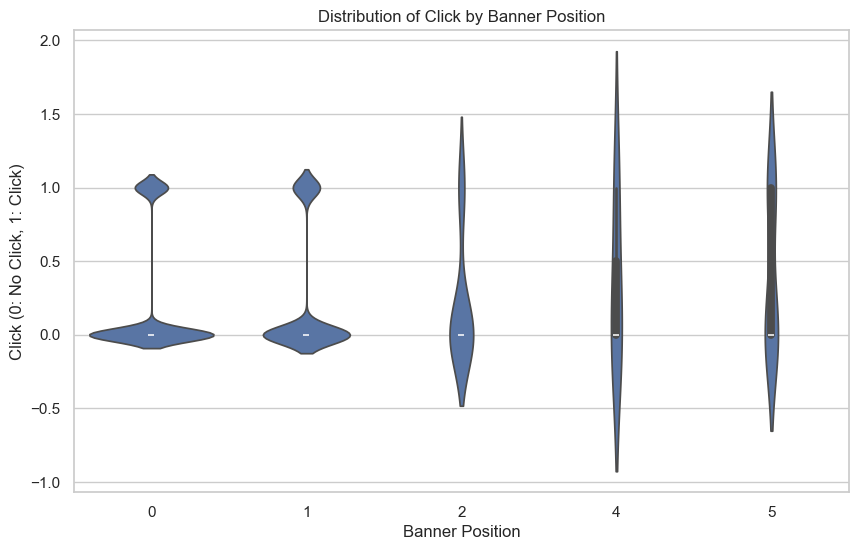

In [165]:
#Step 11:
#violin plot that shows how the binary target variable click is distributed across different values of the categorical feature banner_pos

#Violin plot to visualie
# Violin plot to visualize the distribution of 'click' across different 'banner_pos' values
plt.figure(figsize=(10, 6))
sns.violinplot(data=ctr_df, x='banner_pos', y='click', hue=None)
plt.title('Distribution of Click by Banner Position')
plt.xlabel('Banner Position')
plt.ylabel('Click (0: No Click, 1: Click)')
plt.show()

### Violin Plot: Distribution of Clicks by Banner Position

The plot below shows the distribution of the target variable `click` (0 = No Click, 1 = Click) across different `banner_pos` values using a violin plot.

Each "violin" represents a density distribution for a particular banner position. The thicker regions indicate a higher concentration of data points. From the plot:

- Most banner positions show a high density near `click = 0`, confirming the class imbalance (majority non-clicks).
- Positions like 2 and 5 show more variability or fewer data points.
- This visualization helps assess whether `banner_pos` influences the likelihood of a click, and whether it should be retained as a useful feature for modeling.

Further statistical testing or feature importance analysis can help validate its predictive power.


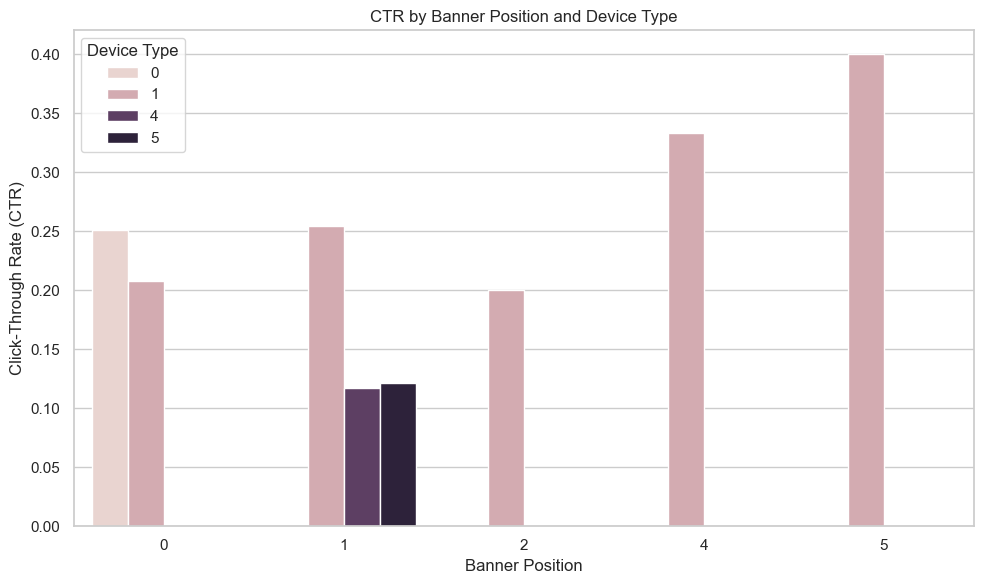

In [167]:
# Step:12 
#CTR by banner_pos + device_type (Clustered Bar Chart)

# Calculate mean CTR grouped by banner_pos and device_type
grouped_ctr = ctr_df.groupby(['banner_pos', 'device_type'])['click'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_ctr, x='banner_pos', y='click', hue='device_type')
plt.title("CTR by Banner Position and Device Type")
plt.ylabel("Click-Through Rate (CTR)")
plt.xlabel("Banner Position")
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


### CTR by Banner Position and Device Type

This above clustered bar plot shows the interaction between `banner_pos` (banner position) and `device_type` on the click-through rate (CTR).

- Interaction effects like this help identify if certain banner positions perform better on specific device types. For example, mobile devices might show better CTR for top banners, while desktops might respond differently.

- The CTR varies across banner positions and device types. This indicates that optimizing ad placement based on the user’s device type could improve campaign performance.

-  Banner position 5 shows the highest CTR for `device_type` 5, suggesting a potential synergy between this banner location and the corresponding device.


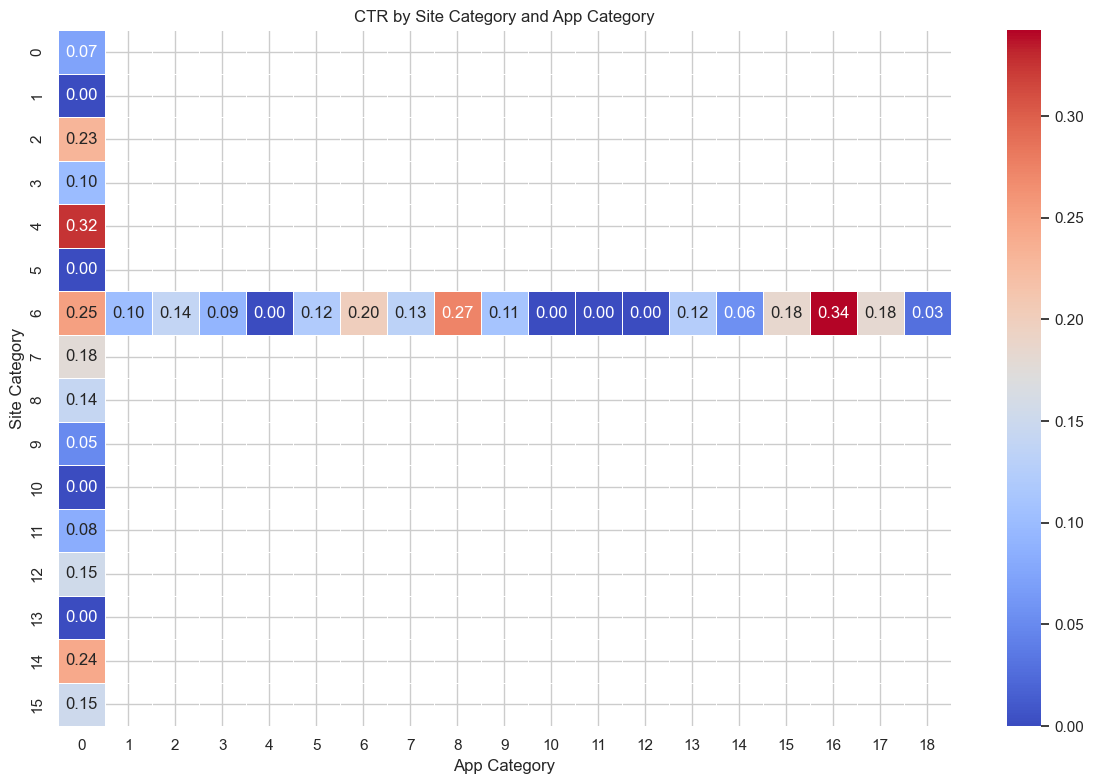

In [169]:
# Step 13: 
# CTR by site_category + app_category (Heatmap)
# Create pivot table for CTR
pivot_table = ctr_df.pivot_table(values='click', 
                                  index='site_category', 
                                  columns='app_category', 
                                  aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("CTR by Site Category and App Category")
plt.xlabel("App Category")
plt.ylabel("Site Category")
plt.tight_layout()
plt.show()


### CTR by Site Category and App Category (Heatmap)

This above Site Category and App Category heatmap visualizes the interaction between `site_category` and `app_category` in terms of their average CTR.

-  This plot reveals how combinations of content categories across websites and apps influence user engagement.

- Some category pairs (e.g., `site_category` 4 with `app_category` 16) yield much higher CTRs (~0.34), while others have near-zero engagement. These hotspots can guide targeted ad placement.

- Identifying strong-performing category intersections allows for better targeting strategies, maximizing ad effectiveness.
 

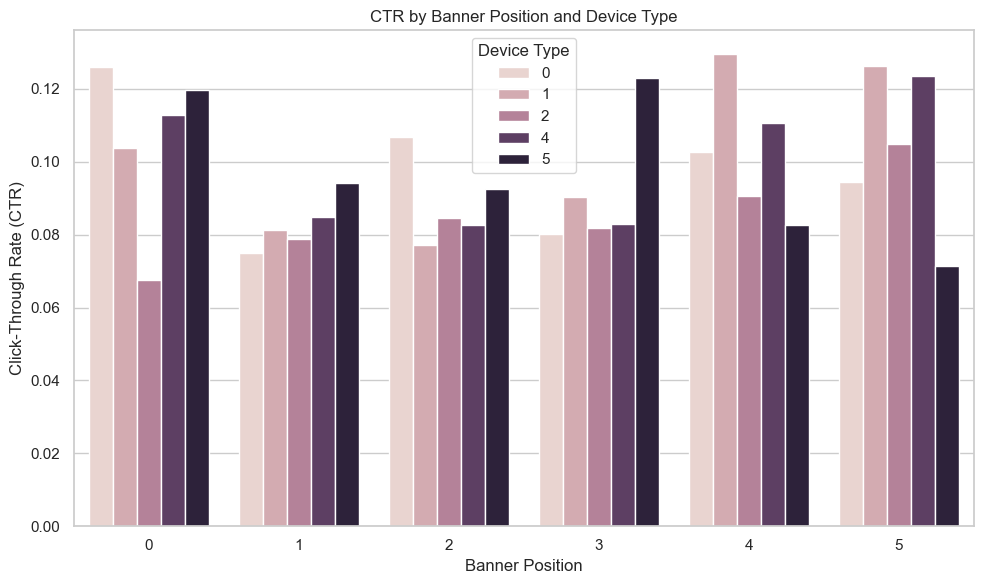

In [175]:
# CTR by Banner Position and Device Type
grouped_ctr = ctr_df.groupby(['banner_pos', 'device_type'])['click'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_ctr, x='banner_pos', y='click', hue='device_type')
plt.title("CTR by Banner Position and Device Type")
plt.ylabel("Click-Through Rate (CTR)")
plt.xlabel("Banner Position")
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


This above clustered bar chart illustrates how CTR varies not just by banner position or device type alone, but by their interaction. 

For example, certain banner positions may perform better on specific device types. These insights can inform ad placement strategies for different devices.


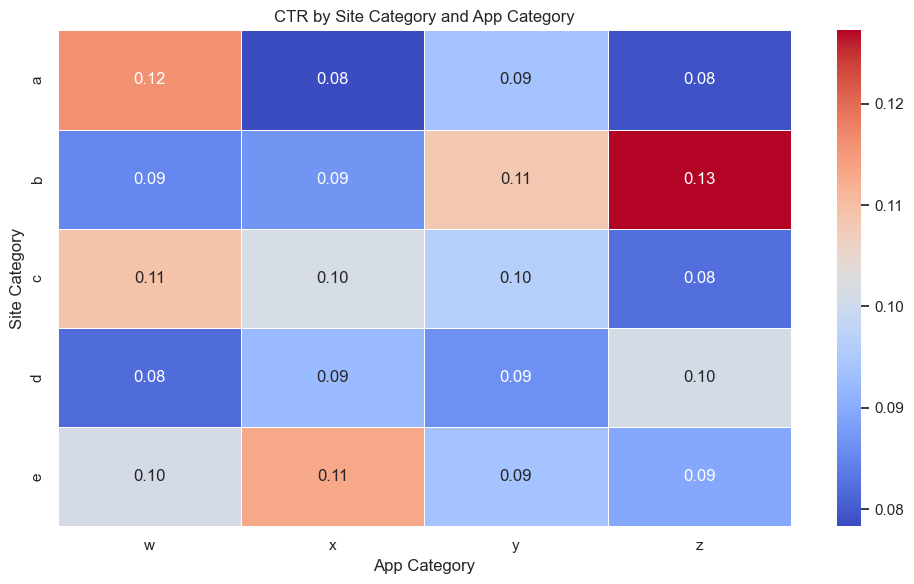

In [178]:
# CTR by Site Category and App Category (Heatmap)

pivot_table = ctr_df.pivot_table(values='click',
                                 index='site_category',
                                 columns='app_category',
                                 aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("CTR by Site Category and App Category")
plt.xlabel("App Category")
plt.ylabel("Site Category")
plt.tight_layout()
plt.show()


This above heatmap helps identify combinations of site and app categories that produce higher or lower CTR. 



Multivariate Interaction Effects

After conducting univariate analysis, we explore how combinations of categorical variables impact click-through rates (CTR). This step uncovers potential interaction effects between features that may not be visible in isolation.

In [190]:
# Check column names fo r Cardinality 
print(ctr_df.columns.tolist())


['click', 'banner_pos', 'device_type', 'site_category', 'app_category']


In [192]:
 # Check Cardinality
ctr_df[['click', 'banner_pos', 'device_type', 'site_category', 'app_category']].nunique().sort_values()


click            2
app_category     4
device_type      5
site_category    5
banner_pos       6
dtype: int64

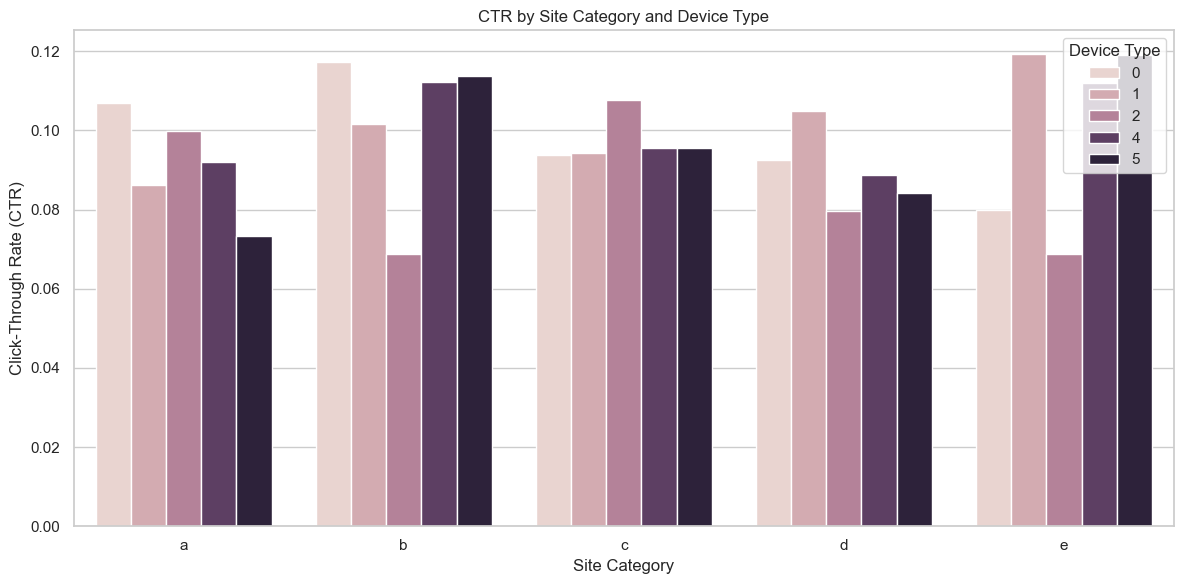

In [198]:
# CTR by Site Category and Device Type (Clustered Bar Chart)

# Group by site_category and device_type to calculate CTR
grouped_ct = ctr_df.groupby(['site_category', 'device_type'])['click'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_ct, x='site_category', y='click', hue='device_type')
plt.title("CTR by Site Category and Device Type")
plt.xlabel("Site Category")
plt.ylabel("Click-Through Rate (CTR)")
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


CTR by Site Category and Device Type

This above clustered bar chart shows how CTR varies across combinations of site_category and device_type. 

From the graph, 

- Certain device types have higher click rates on specific site categories.

- For example, device_type = 0 consistently performs well across several site categories.

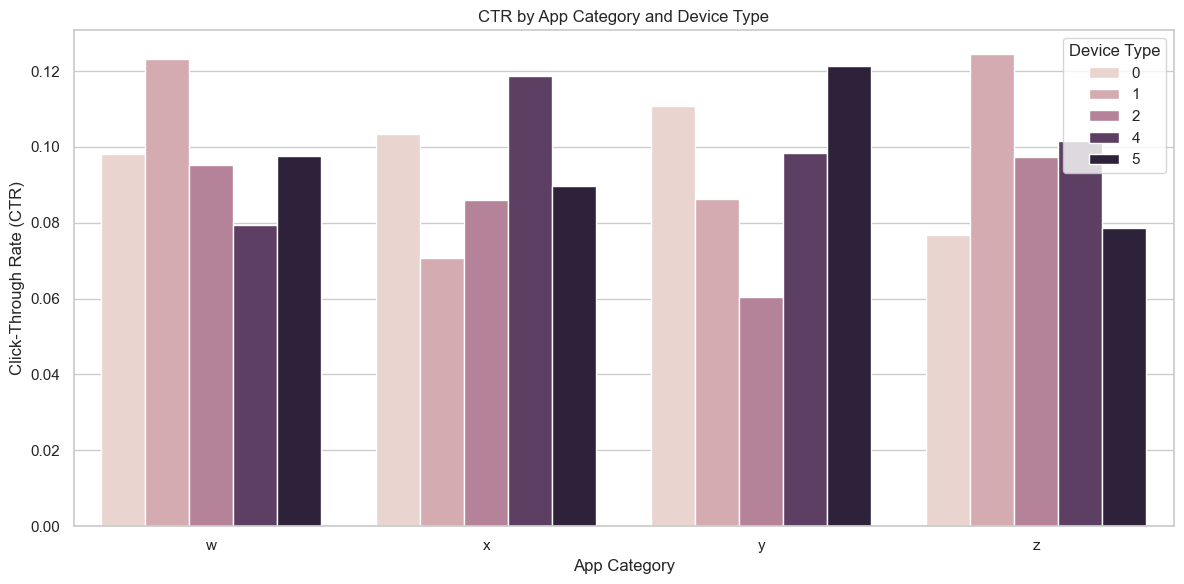

In [200]:
# CTR by App Category and Device Type (Clustered Bar Chart)
# Group by app_category and device_type to calculate CTR
grouped_ct2 = ctr_df.groupby(['app_category', 'device_type'])['click'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_ct2, x='app_category', y='click', hue='device_type')
plt.title("CTR by App Category and Device Type")
plt.xlabel("App Category")
plt.ylabel("Click-Through Rate (CTR)")
plt.legend(title="Device Type")
plt.tight_layout()
plt.show()


CTR by App Category and Device Type

This above above CTR by App Category and Device Type visualization provides a deeper look into how device behavior varies by app category.

For instance, device_type = 5 shows stronger CTR on app_category = y and z.

this helps tailor ads for specific device-app combos.


In [219]:
# Create interaction features based on EDA insights
ctr_df['site_app_combo'] = ctr_df['site_category'].astype(str) + "_" + ctr_df['app_category'].astype(str)
ctr_df['bannerpos_devicetype'] = ctr_df['banner_pos'].astype(str) + "_" + ctr_df['device_type'].astype(str)


These new features are categorical interaction features that help machine learning models capture non-linear patterns between categorical variables — especially useful for tree-based models like XGBoost or Random Forest.

In [221]:
# To understand how many unique categories each new interaction variable has.
ctr_df[['site_app_combo', 'bannerpos_devicetype']].nunique()


site_app_combo          20
bannerpos_devicetype    30
dtype: int64

## Feature Engineering Prep

Based on the multivariate EDA insights, we observed that specific combinations of features (like site category with app category, or banner position with device type) show distinct patterns in click-through rate (CTR). These interactions may carry useful signal for prediction.

To capture these non-linear relationships, we create new categorical interaction features:

- `site_app_combo` = site_category + "_" + app_category
- `bannerpos_devicetype` = banner_pos + "_" + device_type

These engineered features will be passed into the modeling pipeline and evaluated for their contribution to model performance.

Next step: Incorporate these features into preprocessing and encoding before training.


Feature Engineering Suggestions Based on EDA Insights:

Based on the univariate and multivariate analysis, we can derive the following ideas to enhance model input features:

1. Interaction Features
   
Combine site_category and app_category into a new feature such as site_app_combo to capture joint effects seen in the heatmap.

Consider banner_pos_device_type as a new interaction feature based on the clustered bar chart showing differing CTRs across combinations.

2. One-Hot Encoding for Low-Cardinality Categoricals

Features like banner_pos, device_type, and site_category have limited cardinality, so one-hot encoding is appropriate for modeling.

4. Target Encoding for Medium/High-Cardinality Features

If site_id, app_id, or C14–C21 are included later (after validating leakage), use target encoding to reduce dimensionality while retaining predictive signal.

5. Frequency Encoding

Use frequency encoding on features like app_category and site_category to incorporate category prevalence into the model.

7. Drop Uninformative or Redundant Features

Use correlation/Cramér’s V to remove features that are highly correlated or provide redundant information.

##  Conclusion: Exploratory Data Analysis Summary

This EDA provided critical insights into the Click-Through Rate (CTR) prediction dataset. Key takeaways include:

- **Class Imbalance**: The dataset is significantly imbalanced, with far fewer positive (click) samples than negative ones. This must be addressed during model training (e.g., resampling or class-weighted models).
  
- **Feature Cardinality**:
  - Several features such as `site_id`, `app_id`, `device_model`, `device_id`, and `device_ip` exhibit very high cardinality.
  - Target or frequency encoding will be more suitable for these features than One-Hot Encoding.

- **Univariate Distributions**:
  - Most numerical features are skewed or sparse, which may require normalization or transformation.
  - Violin plots highlighted subtle variations in click behavior across features like `banner_pos`, `device_type`, and `device_conn_type`.

- **Bivariate Relationships**:
  - Interaction effects between pairs like `site_category` + `app_category` and `banner_pos` + `device_type` revealed non-trivial patterns that can be engineered as new features.
  
- **Cramér’s V Analysis**:
  - Helped identify redundancy or independence among categorical features.
  - Minimal multicollinearity was observed among the top categorical predictors, allowing us to retain them for modeling.

- **Feature Engineering**:
  - New features such as `site_app_combo` and `bannerpos_devicetype` were created to capture useful interactions between categorical variables.
  - These will be carried forward into the preprocessing and modeling pipeline.

---

###  Next Steps-
- Construct a preprocessing pipeline using `ColumnTransformer` with appropriate encoders.
- Handle class imbalance using techniques like SMOTE, stratified sampling, or custom thresholds.
- Train baseline models and iterate with tuned pipelines.

This thorough EDA lays a strong foundation for effective feature engineering and model development.
